Let’s think like data scientists and clearly define some of his problems: For example, is there data on the prices of other cars and their characteristics? What features of cars affect their prices? Colour? Brand? Does horsepower also affect the selling price, or perhaps, something else?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df=pd.read_csv('cardata.csv')

df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#aba headers specify garna paryo since column header is missing
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [6]:
data=df.copy()

In [7]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [8]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

## Step 4: Converting mpg to L/100km and checking the data type of each column.

In [9]:

data['city-mpg']= 235/ data['city-mpg']
data.rename(columns={'city-mpg':"city-l/100km"},inplace=True)

print(data.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-l/100km',
       'highway-mpg', 'price'],
      dtype='object')


In [10]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-l/100km         float64
highway-mpg            int64
price                 object
dtype: object

In [11]:
data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470


In [12]:
#here price is of type object so we change the data type to int or float


data.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [13]:
#here it contains ? so we drop it

data=data[data.price!='?']

In [14]:
data['price']=data['price'].astype(int)

data.dtypes



C:\Users\Administrator\AppData\Local\Temp\ipykernel_12140\2874981614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=data['price'].astype(int)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-l/100km         float64
highway-mpg            int64
price                  int32
dtype: object

## Step 6: Normalizing values by using simple feature scaling method examples(do for the rest) and binning- grouping values

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.
In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
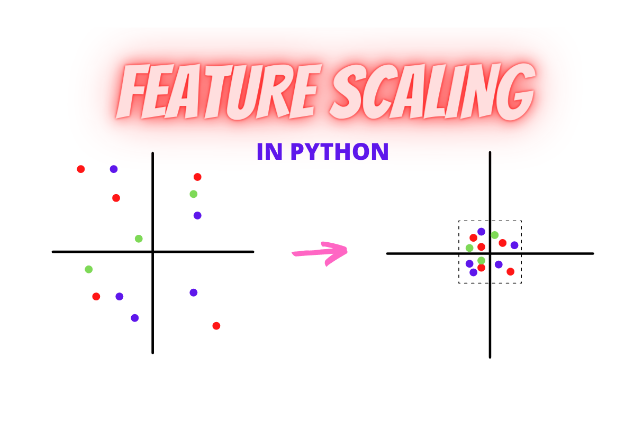

In [15]:
data['length']=data['length']/data['length'].max()
data['width']=data['width']/data['width'].max()
data['height']=data['height']/data['height'].max()

#binning-grouping values

bins=np.linspace(min(data['price']),max(data['price']),4)

group_names=['low','Medium','High']

data['price-binned']=pd.cut(data['price'],bins,labels= group_names,include_lowest=True)
print(bins)
data.sample(20)

[ 5118.         18545.33333333 31972.66666667 45400.        ]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12140\1686540917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length']=data['length']/data['length'].max()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12140\1686540917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['width']=data['width']/data['width'].max()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12140\1686540917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-mpg,price,price-binned
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55,4800,5.222222,50,7099,low
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,1bbl,3.15,3.58,9.0,86,5800,8.703704,33,10295,low
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950,low
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045,Medium
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,13415,low
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.40,10.0,100,5500,9.038462,32,9995,low
87,1,125,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,...,spdi,3.17,3.46,7.5,116,5500,10.217391,30,9279,low
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150,8.392857,33,17950,low
89,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,2bbl,3.15,3.29,9.4,69,5200,7.580645,37,5499,low
138,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,3.62,2.36,9.0,69,4900,7.580645,36,5118,low


0         low
1         low
2         low
3         low
4         low
        ...  
200       low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['low' < 'Medium' < 'High']


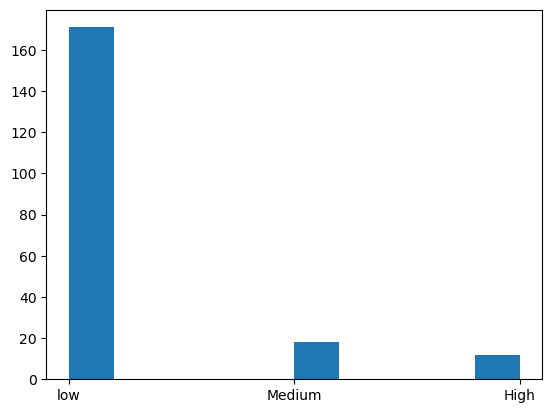

In [16]:
print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [17]:
#here number of cateogorized low price of vehicle exceeds 160 , medium range vehicle near 18 ,high priced cars are lowest 

## Step 7: Doing descriptive analysis of data categorical to numerical values.

In [18]:
data['fuel-type'].tail(10)

195       gas
196       gas
197       gas
198       gas
199       gas
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, dtype: object

In [19]:
pd.get_dummies(data['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [20]:
#this converts categorical to numerical variables as shown above

In [21]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-l/100km,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


## Step 8: Plotting the data according to the price based on engine size.

{'whiskers': [<matplotlib.lines.Line2D at 0x18dc3658280>,
 'caps': [<matplotlib.lines.Line2D at 0x18dc36587c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18dc360bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x18dc3658d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x18dc3658fa0>],
 'means': []}

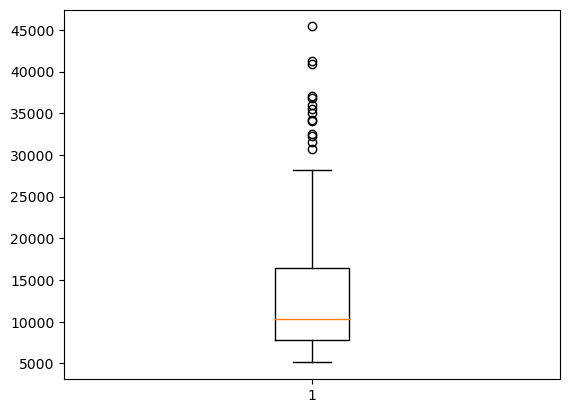

In [22]:
plt.boxplot(data['price'])

<Axes: xlabel='drive-wheels', ylabel='price'>

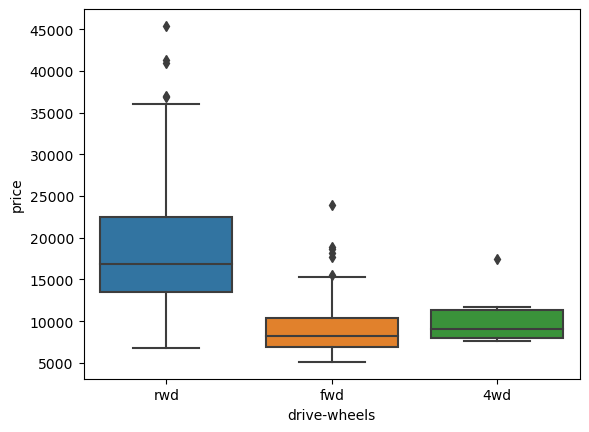

In [23]:
#using seaborn

sns.boxplot(x='drive-wheels',y='price',data= data)

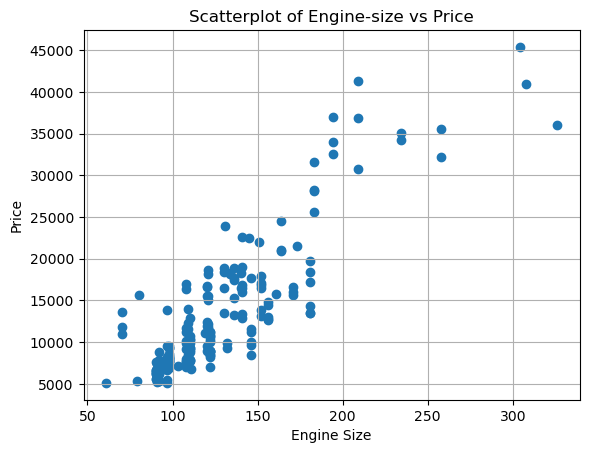

In [24]:
#predicting price based on engine size
#known on x and predictable on y


plt.scatter(data['engine-size'],data['price'])
plt.title('Scatterplot of Engine-size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [25]:
#as we can see the vehicles with enginesize below 200 has price range between  5000 to 25000

In [34]:
#grouping data according to wheel ,bodystyle and price


test= data[['drive-wheels','body-style','price']]
print(test)
data_grp= data[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index =False).mean()

data_grp

    drive-wheels   body-style  price
0            rwd  convertible  13495
1            rwd  convertible  16500
2            rwd    hatchback  16500
3            fwd        sedan  13950
4            4wd        sedan  17450
..           ...          ...    ...
200          rwd        sedan  16845
201          rwd        sedan  19045
202          rwd        sedan  21485
203          rwd        sedan  22470
204          rwd        sedan  22625

[201 rows x 3 columns]


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


## pivot method

In [35]:
#plotting heatmap using pivot method


data_pivot= data_grp.pivot(index = 'drive-wheels',columns = 'body-style')

data_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

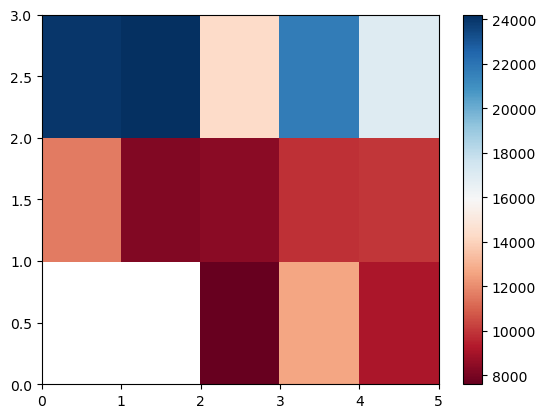

In [40]:
#heatmap for visualizing data

plt.pcolor(data_pivot,cmap ='RdBu')
plt.colorbar()
plt.show(
)

In [43]:
# Analysis of Variance ANOVA
# returns Ftest and pvalue
# f-test =variance between sample gorup means divided by variation within sample group
# p-value= degree of confidence

data_anova = data[['make','price']]
anova_group= data_anova.groupby(['make'])

anova_result= sp.stats.f_oneway(anova_group.get_group('honda')['price']
                                ,anova_group.get_group('subaru')['price'])
print(anova_result)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


In [44]:
#since the f value is smaller than p value as shown abova
#it shows that corelation is weak

##strong correlation between a categorical variable if anova test give large ftest and small p value
#correlation measures dependency not causation


(0.0, 53051.06902774364)

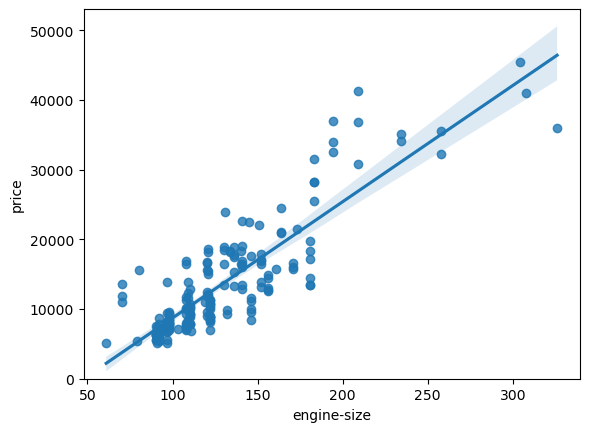

In [46]:
sns.regplot(x='engine-size',y='price',data=data)
plt.ylim(0,)

In [47]:
#the slope is increasing in positive direction that is positive linear relationship